In [19]:
%pylab inline
import numpy as np
import cPickle as pickle
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


/data/jonas/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['legend']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [76]:
debug = pickle.load(open("lll.pickle", 'r'))

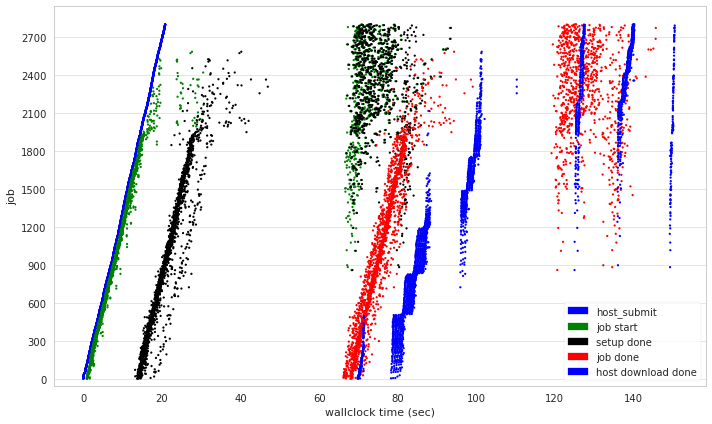

In [77]:
invoke_df = pd.DataFrame(debug['invoke_statuses'])
run_df = pd.DataFrame(debug['run_statuses'])
del run_df['host_submit_time']
jobs_df = pd.concat([run_df, invoke_df], axis=1)


time_offset = np.min(jobs_df.host_submit_time)
fig = pylab.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
total_jobs = len(jobs_df)

y = np.arange(total_jobs)
point_size = 5
ax.scatter(jobs_df.host_submit_time - time_offset, y, c='b', edgecolor='none', s=point_size)
ax.scatter(jobs_df.start_time - time_offset, y, c='g', edgecolor='none', s=point_size)
ax.scatter(jobs_df.start_time + jobs_df.setup_time - time_offset,
y, c='k', edgecolor='none', s=point_size)
ax.scatter(jobs_df.end_time - time_offset, y, c='r', edgecolor='none', s=point_size)
ax.scatter(jobs_df.download_output_timestamp - time_offset, y, c='b', edgecolor='none', s=point_size)

ax.set_xlabel('wallclock time (sec)')
ax.set_ylabel('job')
#pylab.ylim(0, 10)

import matplotlib.patches as mpatches

host_submit_patch = mpatches.Patch(color='b', label='host_submit')
job_start_patch = mpatches.Patch(color='g', label='job start')
setup_done_patch = mpatches.Patch(color='k', label='setup done')

job_done_patch = mpatches.Patch(color='red', label='job done')
host_download_patch = mpatches.Patch(color='b', label='host download done')
legend = pylab.legend(handles=[host_submit_patch, job_start_patch, setup_done_patch, job_done_patch,
                              host_download_patch],
                      loc='lower right', frameon=True)
legend.get_frame().set_facecolor('#FFFFFF')



plot_step = 300  #int(np.min([128, total_jobs/32]))
y_ticks = np.arange(total_jobs//plot_step + 2) * plot_step
ax.set_yticks(y_ticks)
ax.set_ylim(-0.02*total_jobs, total_jobs*1.05)

#ax.set_xlim(-5, np.max(jobs_df.end_time - time_offset)*1.05)
for y in y_ticks:
    ax.axhline(y, c='k', alpha=0.1, linewidth=1)
 
ax.grid(False)
fig.tight_layout()
#fig.savefig("jobs.1000.png", dpi=300)

In [84]:
run_df.()

,aws_request_id,call_id,callset_id,data_download_time,data_key,end_time,exception,exec_time,func_download_time,func_key,...,log_stream_name,output_key,runtime_cached,runtime_s3_bucket_used,runtime_s3_key_used,server_info,setup_time,start_time,status_key,stdout
0,a1178246-1d49-11e7-ac8f-a507122b9ac9,00000,2e5e0b5f-8257-4b7e-bba8-025aa19e220a,0.251210,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",1.491759e+09,None,54.244142,0.239695,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",...,2017/04/09/[$LATEST]2df4133edc704f9c90bc5e657f...,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",False,ericmjonas-public,2676f1-pywren.runtime/pywren_runtime-2.7-defau...,{u'uname': u'Linux ip-10-13-238-43 4.4.51-40.6...,12.779571,1.491759e+09,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",
1,a1195795-1d49-11e7-9d36-bbf84896f9d7,00001,2e5e0b5f-8257-4b7e-bba8-025aa19e220a,0.324049,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",1.491759e+09,None,54.160191,0.311881,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",...,2017/04/09/[$LATEST]28d0b4cd473a4c36b57811f0d7...,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",False,ericmjonas-public,60c18e-pywren.runtime/pywren_runtime-2.7-defau...,{u'uname': u'Linux ip-10-11-105-61 4.4.51-40.6...,13.162646,1.491759e+09,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",
2,a118941d-1d49-11e7-b85d-cd8cfbe71b5e,00002,2e5e0b5f-8257-4b7e-bba8-025aa19e220a,0.146029,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",1.491759e+09,None,52.164920,0.133238,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",...,2017/04/09/[$LATEST]b9a9cfdfb055430a9a5a07cb2e...,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",False,ericmjonas-public,6b9964-pywren.runtime/pywren_runtime-2.7-defau...,{u'uname': u'Linux ip-10-11-112-157 4.4.51-40....,12.980505,1.491759e+09,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",
3,a119a5fe-1d49-11e7-a3b9-c12bf4a13fd7,00003,2e5e0b5f-8257-4b7e-bba8-025aa19e220a,0.201496,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",1.491759e+09,None,56.160131,0.187360,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",...,2017/04/09/[$LATEST]6b01e7a387304616a70c9ba1d0...,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",False,ericmjonas-public,70fd5d-pywren.runtime/pywren_runtime-2.7-defau...,{u'uname': u'Linux ip-10-11-67-239 4.4.51-40.6...,12.838957,1.491759e+09,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",
4,a1158687-1d49-11e7-91e8-3f63c5bc64ba,00004,2e5e0b5f-8257-4b7e-bba8-025aa19e220a,0.301164,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",1.491759e+09,None,54.209761,0.226148,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",...,2017/04/09/[$LATEST]fc173b4308cf4e80b071222ecc...,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",False,ericmjonas-public,ca6f31-pywren.runtime/pywren_runtime-2.7-defau...,{u'uname': u'Linux ip-10-12-68-185 4.4.51-40.6...,12.964280,1.491759e+09,"[jonas-us-west-2, pywren.jobs/2e5e0b5f-8257-4b...",


In [79]:
remote_invoke_df = pd.DataFrame(debug['remote_invoke_statuses'])
remote_run_df = pd.DataFrame(debug['remote_run_statuses'])
#del remote_run_df['host_submit_time']
remote_jobs_df = pd.concat([remote_run_df, remote_invoke_df], axis=1)
remote_jobs_df['invoker_pos'] = debug['remote_results_local_invoker']
remote_jobs_df['invoke_hwaddr'] = [a[1] for a in debug['remote_results']]
remote_jobs_df['remote_hwaddr'] = [a[2] for a in debug['remote_results']]

In [83]:
remote_run

,invoker_pos,invoke_hwaddr,remote_hwaddr


In [82]:
remote_jobs_df.remote_hwaddr.value_counts()

Series([], Name: remote_hwaddr, dtype: int64)

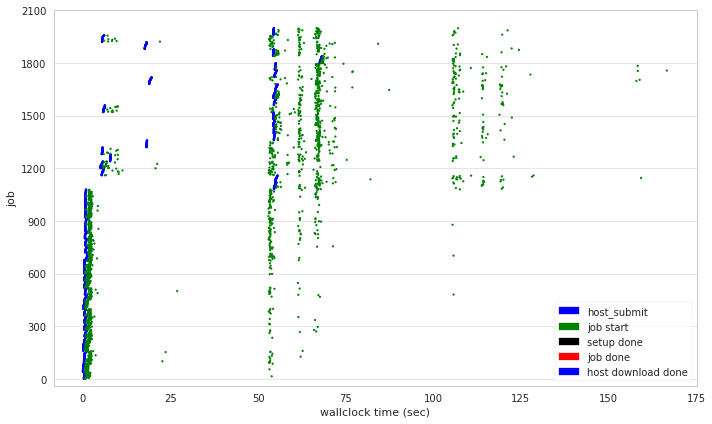

In [66]:


time_offset = np.min(remote_jobs_df.host_submit_time)
fig = pylab.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
total_jobs = len(remote_jobs_df)

y = np.arange(total_jobs)
point_size = 5
ax.scatter(remote_jobs_df.host_submit_time - time_offset, y, c='b', edgecolor='none', s=point_size)
ax.scatter(remote_jobs_df.start_time - time_offset, y, c='g', edgecolor='none', s=point_size)
#ax.scatter(remote_jobs_df.start_time + remote_jobs_df.setup_time - time_offset,
#    y, c='k', edgecolor='none', s=point_size)
#ax.scatter(remote_jobs_df.end_time - time_offset, y, c='r', edgecolor='none', s=point_size)
#ax.scatter(remote_jobs_df.download_output_timestamp - time_offset, y, c='b', edgecolor='none', s=point_size)

ax.set_xlabel('wallclock time (sec)')
ax.set_ylabel('job')
#pylab.ylim(0, 10)

import matplotlib.patches as mpatches

host_submit_patch = mpatches.Patch(color='b', label='host_submit')
job_start_patch = mpatches.Patch(color='g', label='job start')
setup_done_patch = mpatches.Patch(color='k', label='setup done')

job_done_patch = mpatches.Patch(color='red', label='job done')
host_download_patch = mpatches.Patch(color='b', label='host download done')
legend = pylab.legend(handles=[host_submit_patch, job_start_patch, setup_done_patch, job_done_patch,
                              host_download_patch],
                      loc='lower right', frameon=True)
legend.get_frame().set_facecolor('#FFFFFF')



plot_step = 300  #int(np.min([128, total_jobs/32]))
y_ticks = np.arange(total_jobs//plot_step + 2) * plot_step
ax.set_yticks(y_ticks)
ax.set_ylim(-0.02*total_jobs, total_jobs*1.05)

#ax.set_xlim(-5, np.max(remote_jobs_df.end_time - time_offset)*1.05)
for y in y_ticks:
    ax.axhline(y, c='k', alpha=0.1, linewidth=1)
 
ax.grid(False)
fig.tight_layout()
#fig.savefig("jobs.1000.png", dpi=300)

(0, 1000)

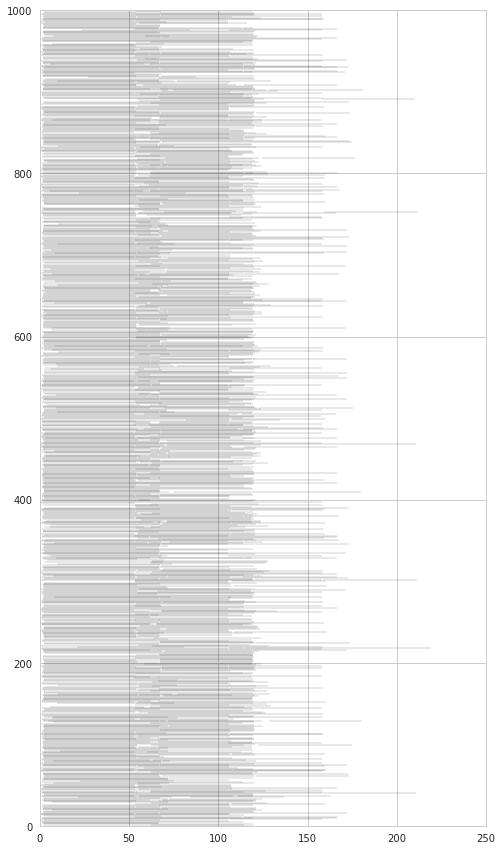

In [67]:
from matplotlib.collections import LineCollection

line_segments = []
hpos = 0
for remote_mac, r in remote_jobs_df.groupby('remote_hwaddr'):

    for row_i, row in r.iterrows():
        x_start = row.start_time - time_offset
        x_end =row.end_time - time_offset
        line_segments.append([[x_start, hpos], [x_end,hpos]])
    hpos += 1
    
    
    
line_segments = LineCollection(line_segments, color='k', alpha=0.1,
                               linestyles='solid')
#line_segments.set_array(x)
fig = pylab.figure(figsize=(8, 15))
ax = fig.add_subplot(1, 1, 1)

ax.add_collection(line_segments)
ax.set_xlim(0, 250)
ax.set_ylim(0, 1000)